In [2]:
#!pip install pandas

     ---------------------------------------- 0.0/61.0 kB ? eta -:--:--
     ------------------------- ------------ 41.0/61.0 kB 991.0 kB/s eta 0:00:01
     ------------------------------- ------ 51.2/61.0 kB 525.1 kB/s eta 0:00:01
     -------------------------------------- 61.0/61.0 kB 540.4 kB/s eta 0:00:00
   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   ---------------------------------------- 0.1/11.5 MB 2.8 MB/s eta 0:00:05
    --------------------------------------- 0.3/11.5 MB 3.0 MB/s eta 0:00:04
   - -------------------------------------- 0.4/11.5 MB 3.1 MB/s eta 0:00:04
   -- ------------------------------------- 0.6/11.5 MB 3.1 MB/s eta 0:00:04
   -- ------------------------------------- 0.7/11.5 MB 3.4 MB/s eta 0:00:04
   --- ------------------------------------ 0.9/11.5 MB 3.3 MB/s eta 0:00:04
   --- ------------------------------------ 1.1/11.5 MB 3.3 MB/s eta 0:00:04
   ---- ----------------------------------- 1.2/11.5 MB 3.2 MB/s eta 0:00:04
  

In [5]:
#!pip install matplotlib

  Using cached matplotlib-3.8.3-cp312-cp312-win_amd64.whl.metadata (5.9 kB)
  Using cached contourpy-1.2.0-cp312-cp312-win_amd64.whl.metadata (5.8 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.49.0-cp312-cp312-win_amd64.whl.metadata (162 kB)
  Using cached kiwisolver-1.4.5-cp312-cp312-win_amd64.whl.metadata (6.5 kB)
  Using cached pillow-10.2.0-cp312-cp312-win_amd64.whl.metadata (9.9 kB)
  Using cached pyparsing-3.1.1-py3-none-any.whl.metadata (5.1 kB)
Using cached matplotlib-3.8.3-cp312-cp312-win_amd64.whl (7.6 MB)
Using cached contourpy-1.2.0-cp312-cp312-win_amd64.whl (187 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.49.0-cp312-cp312-win_amd64.whl (2.2 MB)
Using cached kiwisolver-1.4.5-cp312-cp312-win_amd64.whl (56 kB)
Using cached pillow-10.2.0-cp312-cp312-win_amd64.whl (2.6 MB)
Using cached pyparsing-3.1.1-py3-none-any.whl (103 kB)


In [79]:
#!pip install seaborn

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ------------ --------------------------- 92.2/294.9 kB 2.6 MB/s eta 0:00:01
   ------------------------------ --------- 225.3/294.9 kB 2.8 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 2.6 MB/s eta 0:00:00


In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
df01 = pd.read_csv("output0_copilot.csv")
df02 = pd.read_csv("output0.csv")
df03 = pd.read_csv("output0_nga2.csv")

In [60]:
df0 = pd.concat([df01, df02, df03], axis=0)

In [61]:
df1 = pd.read_csv("output1_nga_copilot_nga2.csv")

In [62]:
df2 = pd.read_csv("output2_notsum2.csv")

In [63]:
df0["prompt_num"] = 0
df1["prompt_num"] = 1
df2["prompt_num"] = 2

In [65]:
user_msg1 = list(df1["user_msg"])
bot_msg1 = list(df1["bot_msg"])
user_len1 = [len(x) for x in user_msg1]
bot_len1 = [len(x) for x in bot_msg1]
print(user_len1)
print(bot_len1)
user_len1 = [user_len1[0]] + [user_len1[i] + bot_len1[i-1] for i in range(1, len(user_len1))]
user_prompt1 = [user_msg1[0]] + [bot_msg1[i-1]+" " + user_msg1[i] for i in range(1, len(user_msg1))]
print(user_len1)
df0["prompt_len"] = [len(x) for x in list(df0["user_msg"])]
df1["prompt_len"] = user_len1
df1["prompt"] = user_prompt1
df0["prompt"] = list(df0["user_msg"])

[20, 17, 16, 38, 44, 18, 21, 29, 33, 24, 46, 36, 43, 20, 20, 23, 27, 33, 42, 21, 25, 16, 20, 40, 39, 44, 45, 47, 62, 41, 37, 39, 20, 16, 36, 33, 19, 21, 30, 37, 18, 54, 61, 20, 25, 38, 20, 30, 44, 33, 29, 27, 29, 38, 34, 20, 33, 25, 26, 37, 40, 18, 15, 35, 18, 23, 20, 13, 16, 20, 21, 22, 39, 17, 25, 40, 40, 20, 18, 35, 27, 23, 23, 23, 14, 33, 33, 32]
[440, 53, 19, 3, 7, 10, 13, 7, 12, 17, 3, 104, 113, 55, 82, 10, 1, 16, 16, 7, 2, 8, 375, 736, 489, 71, 78, 6, 692, 902, 677, 577, 711, 138, 128, 318, 57, 78, 342, 119, 12, 69, 904, 546, 65, 45, 21, 129, 210, 271, 317, 97, 138, 551, 306, 400, 415, 1013, 973, 228, 495, 29, 2, 6, 13, 3, 35, 9, 32, 11, 21, 3, 5, 98, 85, 85, 4, 509, 374, 382, 688, 1056, 1099, 756, 250, 523, 54, 93]
[20, 457, 69, 57, 47, 25, 31, 42, 40, 36, 63, 39, 147, 133, 75, 105, 37, 34, 58, 37, 32, 18, 28, 415, 775, 533, 116, 125, 68, 733, 939, 716, 597, 727, 174, 161, 337, 78, 108, 379, 137, 66, 130, 924, 571, 103, 65, 51, 173, 243, 300, 344, 126, 176, 585, 326, 433, 440, 

,id,msg_timestamp,img_url,user_msg,bot_msg,sum_msg,date,runtime,feedback,user_id,prompt_num,prompt_len,prompt
0,1,1708924985892,https://t0.gstatic.com/licensed-image?q=tbn:AN...,Describe this image.,A black and white photograph captures the RMS ...,A black and white photograph captures the RMS ...,2024-02-26 05:23:23.000000,17.218090,like,1,1,20,Describe this image.
1,2,1708925006349,https://t0.gstatic.com/licensed-image?q=tbn:AN...,What is its name?,The name of the ship in the image is the RMS T...,The name of the ship in the image is the RMS T...,2024-02-26 05:23:29.000000,2.899502,like,1,1,457,A black and white photograph captures the RMS ...
2,3,1708925011374,https://t0.gstatic.com/licensed-image?q=tbn:AN...,Where is it now?,It is in the ocean.,It is in the ocean.,2024-02-26 05:23:32.000000,1.295354,dislike,1,1,69,The name of the ship in the image is the RMS T...
3,4,1708925020551,https://t0.gstatic.com/licensed-image?q=tbn:AN...,How many people survived this tragedy?,700,700,2024-02-26 05:23:41.000000,1.097980,dislike,1,1,57,It is in the ocean. How many people survived t...
4,5,1708925030102,https://t0.gstatic.com/licensed-image?q=tbn:AN...,Is there any movie related to this incident?,titanic,titanic,2024-02-26 05:23:51.000000,1.084046,like,1,1,47,700 Is there any movie related to this incident?
...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,84,1708927239752,https://hellobark.com/wp-content/uploads/corgi...,What trick can they do?,maintaining their overall health and well-bein...,maintaining their overall health and well-bein...,2024-02-26 06:00:59.000000,19.309208,dislike,1,1,1122,4. Provide mental stimulation: Corgis have a n...
84,85,1708927325235,https://hellobark.com/wp-content/uploads/corgi...,Are they cute?,"Yes, Corgis are known for their adorable appea...","Yes, Corgis are known for their adorable appea...",2024-02-26 06:02:12.000000,7.030887,like,1,1,770,maintaining their overall health and well-bein...
85,86,1708927361062,https://hellobark.com/wp-content/uploads/corgi...,What are possible names for them?,"Corgis can have a variety of names, ranging fr...","Corgis can have a variety of names, ranging fr...",2024-02-26 06:02:58.000000,17.627223,like,1,1,283,"Yes, Corgis are known for their adorable appea..."
86,87,1708927468082,https://hellobark.com/wp-content/uploads/corgi...,Do corgis have different species?,"No, Corgis are a breed of dog, not a separate ...","No, Corgis are a breed of dog, not a separate ...",2024-02-26 06:04:31.000000,3.325975,like,1,1,556,"Corgis can have a variety of names, ranging fr..."


In [67]:
df2["prompt_len"] = list([len(row) for row in list(df2.prompt)])

In [68]:
df = pd.concat([df0, df1, df2], axis = 0)
df

,id,msg_timestamp,img_url,user_msg,bot_msg,sum_msg,date,runtime,feedback,user_id,prompt_num,prompt_len,prompt
0,1,1708918919467,https://www.kone.sg/Images/Marina%20Bay%20Sand...,Describe this image.,The image showcases a modern city skyline with...,The image showcases a modern city skyline with...,2024-02-26 03:42:25.000000,25.214590,like,1,0,20,Describe this image.
1,2,1708918948293,https://www.kone.sg/Images/Marina%20Bay%20Sand...,What is the name of the city that you are desc...,singapore,singapore,2024-02-26 03:42:29.000000,0.964028,like,1,0,53,What is the name of the city that you are desc...
2,3,1708918962453,https://www.kone.sg/Images/Marina%20Bay%20Sand...,What is the name of the building complex that ...,Marina Bay Sands,Marina Bay Sands,2024-02-26 03:42:43.000000,1.078314,like,1,0,105,What is the name of the building complex that ...
3,4,1708918969676,https://www.kone.sg/Images/Marina%20Bay%20Sand...,What is the name of the horizontal structure t...,Bridge,Bridge,2024-02-26 03:42:50.000000,0.809339,dislike,1,0,64,What is the name of the horizontal structure t...
4,5,1708918975508,https://www.kone.sg/Images/Marina%20Bay%20Sand...,What is the height of the sky park and how muc...,The Marina Bay Sands SkyPark is approximately ...,The Marina Bay Sands SkyPark is approximately ...,2024-02-26 03:43:10.000000,14.704392,like,1,0,62,What is the height of the sky park and how muc...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,104,1709094583928,"https://assets.myntassets.com/dpr_1.5,q_60,w_4...",Can this be used underwater?,no,no,2024-02-28 04:29:44.000000,0.781053,dislike,1,2,46,male 3 yes 10 1/2 Can this be used underwater?
104,105,1709094591111,"https://assets.myntassets.com/dpr_1.5,q_60,w_4...",Can this be washed with the washing machine?,no,no,2024-02-28 04:29:51.000000,0.765572,dislike,1,2,54,10 1/2 no Can this be washed with the washing ...
105,106,1709094596224,"https://assets.myntassets.com/dpr_1.5,q_60,w_4...",Which kind of leather is this made from?,synthetic 100%,synthetic 100%,2024-02-28 04:29:57.000000,1.484435,dislike,1,2,46,no no Which kind of leather is this made from?
106,107,1709094602440,"https://assets.myntassets.com/dpr_1.5,q_60,w_4...",What material is this sole made of?,rubber 100%,rubber 100%,2024-02-28 04:30:03.000000,1.406558,like,1,2,53,no synthetic 100% What material is this sole m...


In [69]:
df["user_len"] = df.apply(lambda row: len(row["user_msg"]), axis= 1)
df["bot_len"] = df.apply(lambda row: len(row["bot_msg"]), axis= 1)

In [70]:
df

,id,msg_timestamp,img_url,user_msg,bot_msg,sum_msg,date,runtime,feedback,user_id,prompt_num,prompt_len,prompt,user_len,bot_len
0,1,1708918919467,https://www.kone.sg/Images/Marina%20Bay%20Sand...,Describe this image.,The image showcases a modern city skyline with...,The image showcases a modern city skyline with...,2024-02-26 03:42:25.000000,25.214590,like,1,0,20,Describe this image.,20,672
1,2,1708918948293,https://www.kone.sg/Images/Marina%20Bay%20Sand...,What is the name of the city that you are desc...,singapore,singapore,2024-02-26 03:42:29.000000,0.964028,like,1,0,53,What is the name of the city that you are desc...,53,9
2,3,1708918962453,https://www.kone.sg/Images/Marina%20Bay%20Sand...,What is the name of the building complex that ...,Marina Bay Sands,Marina Bay Sands,2024-02-26 03:42:43.000000,1.078314,like,1,0,105,What is the name of the building complex that ...,105,16
3,4,1708918969676,https://www.kone.sg/Images/Marina%20Bay%20Sand...,What is the name of the horizontal structure t...,Bridge,Bridge,2024-02-26 03:42:50.000000,0.809339,dislike,1,0,64,What is the name of the horizontal structure t...,64,6
4,5,1708918975508,https://www.kone.sg/Images/Marina%20Bay%20Sand...,What is the height of the sky park and how muc...,The Marina Bay Sands SkyPark is approximately ...,The Marina Bay Sands SkyPark is approximately ...,2024-02-26 03:43:10.000000,14.704392,like,1,0,62,What is the height of the sky park and how muc...,62,456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,104,1709094583928,"https://assets.myntassets.com/dpr_1.5,q_60,w_4...",Can this be used underwater?,no,no,2024-02-28 04:29:44.000000,0.781053,dislike,1,2,46,male 3 yes 10 1/2 Can this be used underwater?,28,2
104,105,1709094591111,"https://assets.myntassets.com/dpr_1.5,q_60,w_4...",Can this be washed with the washing machine?,no,no,2024-02-28 04:29:51.000000,0.765572,dislike,1,2,54,10 1/2 no Can this be washed with the washing ...,44,2
105,106,1709094596224,"https://assets.myntassets.com/dpr_1.5,q_60,w_4...",Which kind of leather is this made from?,synthetic 100%,synthetic 100%,2024-02-28 04:29:57.000000,1.484435,dislike,1,2,46,no no Which kind of leather is this made from?,40,14
106,107,1709094602440,"https://assets.myntassets.com/dpr_1.5,q_60,w_4...",What material is this sole made of?,rubber 100%,rubber 100%,2024-02-28 04:30:03.000000,1.406558,like,1,2,53,no synthetic 100% What material is this sole m...,35,11


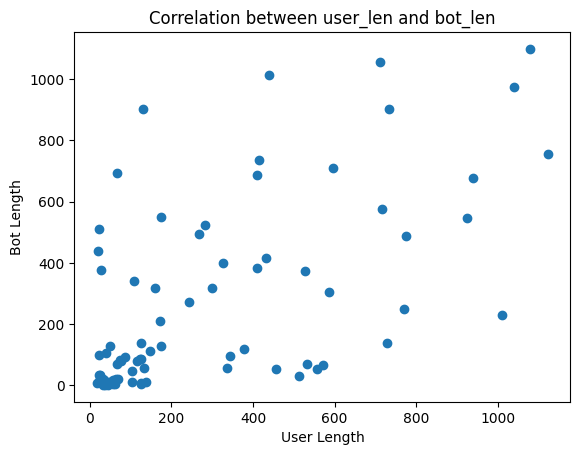

In [71]:
# Scatter plot
plt.scatter(df[df["prompt_num"]==1]['prompt_len'], df[df["prompt_num"]==1]['bot_len'])
plt.title('Correlation between user_len and bot_len')
plt.xlabel('User Length')
plt.ylabel('Bot Length')
plt.show()


In [72]:
correlation_coefficient = df[df["prompt_num"]==1]['prompt_len'].corr(df[df["prompt_num"]==1]['bot_len'])
print(f"Correlation coefficient: {correlation_coefficient}")


Correlation coefficient: 0.6328525639562295


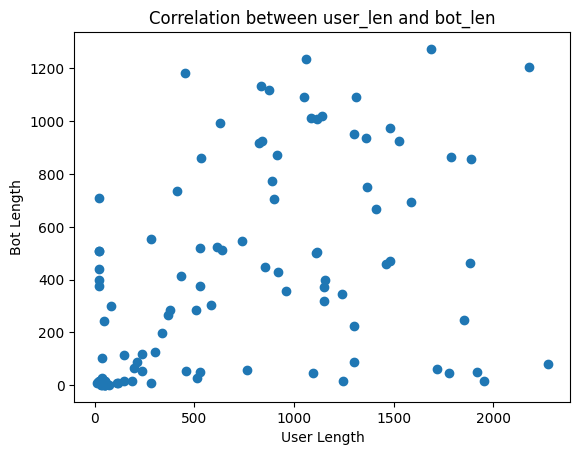

In [73]:
# Scatter plot
plt.scatter(df[df["prompt_num"]==2]['prompt_len'], df[df["prompt_num"]==2]['bot_len'])
plt.title('Correlation between user_len and bot_len')
plt.xlabel('User Length')
plt.ylabel('Bot Length')
plt.show()

In [74]:
correlation_coefficient = df[df["prompt_num"]==2]['prompt_len'].corr(df[df["prompt_num"]==2]['bot_len'])
print(f"Correlation coefficient: {correlation_coefficient}")

Correlation coefficient: 0.4719236870522359


In [77]:
df0.feedback.value_counts()

feedback
dislike    78
like       61
Name: count, dtype: int64

In [75]:
df1.feedback.value_counts()

feedback
like       60
dislike    28
Name: count, dtype: int64

In [76]:
df2.feedback.value_counts()

feedback
like       76
dislike    31
Name: count, dtype: int64

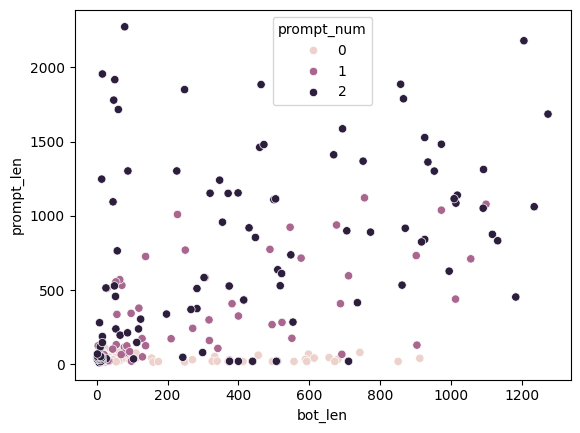

In [82]:
# Plot a scatter plot of prompt_len versus bot_len with hue = prompt_num
sns.scatterplot(data=df, y="prompt_len", x="bot_len", hue="prompt_num")

# Show the plot
plt.show()


In [84]:
df.to_csv("df.csv")